In [5]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import sklearn as sk

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Data/creditcard.csv')

# Display the first few rows of the dataset to inspect the structure
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Display basic information about the DataFrame
df.info()

# Display the first few rows of the DataFrame
df.head()

# Check for missing values
df.isnull().sum()

# Assuming pre_processed_df is your pre-processed DataFrame
class_counts = df['Class'].value_counts()

# Print the number of ones (fraudulent transactions)
number_of_ones = class_counts[1] if 1 in class_counts else 0
print(f"Number of ones (fraudulent transactions): {number_of_ones}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming df is your DataFrame
features_for_clustering = df.drop('Class', axis=1)  # Exclude 'Class' from features

# 1. Handling Missing Values
# Option 1: Drop rows with missing values
# features_for_clustering = features_for_clustering.dropna()

# Option 2: Impute missing values (using mean as an example, choose as needed)
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features_for_clustering), columns=features_for_clustering.columns)

# 2. Normalization (MinMax Scaling)
scaler_minmax = MinMaxScaler()
features_normalized = pd.DataFrame(scaler_minmax.fit_transform(features_imputed), columns=features_imputed.columns)

# 3. Standardization
scaler_standard = StandardScaler()
features_standardized = pd.DataFrame(scaler_standard.fit_transform(features_normalized), columns=features_normalized.columns)

# Combine pre-processed features with the 'Class' column
pre_processed_df = pd.concat([features_standardized, df['Class']], axis=1)
pre_processed_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


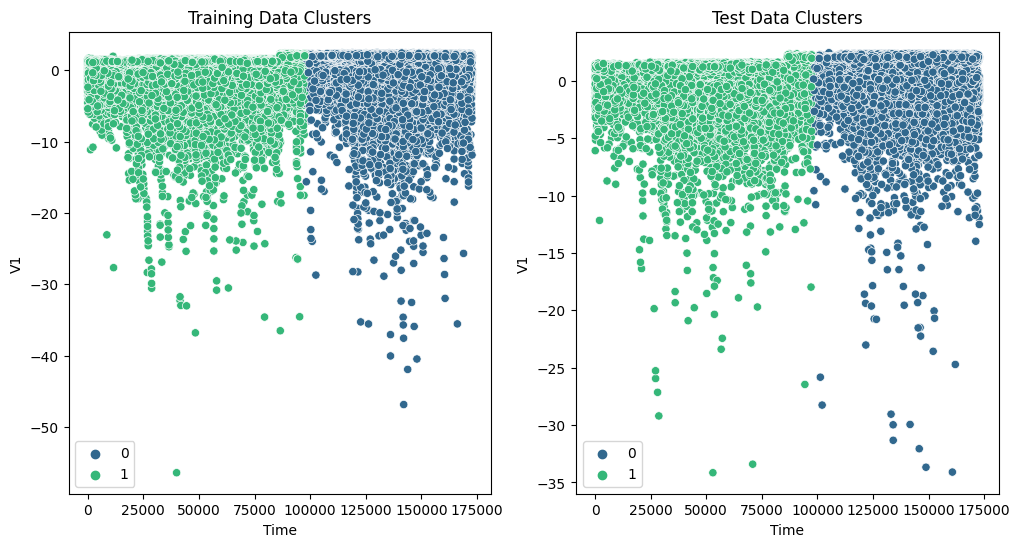

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your pre-processed DataFrame and 'Class' is your target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply K-Means clustering on the training data
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_train_clusters = kmeans.fit_predict(X_train)

# Apply K-Means clustering on the test data
y_test_clusters = kmeans.predict(X_test)

# Visualize the clusters on the training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train_clusters, palette='viridis', legend='full')
plt.title('Training Data Clusters')

# Visualize the clusters on the test data
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_test_clusters, palette='viridis', legend='full')
plt.title('Test Data Clusters')

plt.show()


In [9]:
pre_processed_df['cluster_label'] = kmeans.fit_predict(X)

# Now you should have the 'cluster_label' column in your DataFrame

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Assuming pre_processed_df is your pre-processed DataFrame with 'Class' and 'cluster_label' columns
y_true = pre_processed_df['Class']
y_pred = pre_processed_df['cluster_label']

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision for class 1 (fraudulent transactions)
precision_class_1 = precision_score(y_true, y_pred, pos_label=1)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision for Class 1 (fraudulent transactions):", precision_class_1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Confusion Matrix:
[[152833 131482]
 [   330    162]]

Accuracy: 0.5371883415786831
Precision for Class 1 (fraudulent transactions): 0.0012305915955151774


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming pre_processed_df is your pre-processed DataFrame with 'Class' and features
X_classification = pre_processed_df.drop('Class', axis=1)
y_classification = pre_processed_df['Class']

# Split the data into training and testing sets (80% train, 20% test)
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Check the balance between fraudulent and non-fraudulent transactions in the training set
fraudulent_count_train = y_train_classification.sum()
non_fraudulent_count_train = len(y_train_classification) - fraudulent_count_train

print("Training Set:")
print("Number of Fraudulent Transactions:", fraudulent_count_train)
print("Number of Non-Fraudulent Transactions:", non_fraudulent_count_train)

# Standardize the features (optional but can be beneficial for some algorithms)
scaler_classification = StandardScaler()
X_train_classification_std = scaler_classification.fit_transform(X_train_classification)
X_test_classification_std = scaler_classification.transform(X_test_classification)


Training Set:
Number of Fraudulent Transactions: 394
Number of Non-Fraudulent Transactions: 227451


In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Choose a classification algorithm (e.g., Support Vector Machine)
# classifier = SVC(random_state=42)
# Alternatively, you can use Logistic Regression
classifier = LogisticRegression(random_state=42)

# Train the classifier on the training data
classifier.fit(X_train_classification_std, y_train_classification)

# Make predictions on the test data
y_pred_classification = classifier.predict(X_test_classification_std)


In [15]:
# Evaluate the classification performance
conf_matrix_classification = confusion_matrix(y_test_classification, y_pred_classification)
accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
precision_classification = precision_score(y_test_classification, y_pred_classification, pos_label=1)
recall_classification = recall_score(y_test_classification, y_pred_classification, pos_label=1)
f1_classification = f1_score(y_test_classification, y_pred_classification, pos_label=1)

# Print classification results
print("\nClassification Results:")
print("Confusion Matrix:")
print(conf_matrix_classification)
print("\nAccuracy:", accuracy_classification)
print("Precision for Class 1 (fraudulent transactions):", precision_classification)
print("Recall for Class 1 (fraudulent transactions):", recall_classification)
print("F1-Score for Class 1 (fraudulent transactions):", f1_classification)



Classification Results:
Confusion Matrix:
[[56855     9]
 [   41    57]]

Accuracy: 0.9991222218320986
Precision for Class 1 (fraudulent transactions): 0.8636363636363636
Recall for Class 1 (fraudulent transactions): 0.5816326530612245
F1-Score for Class 1 (fraudulent transactions): 0.6951219512195121


In [16]:
# Compare clustering and classification results
print("\nComparison:")
print("Clustering Results:")
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision for Class 1 (fraudulent transactions):", precision_class_1)

print("\nClassification Results:")
print("Confusion Matrix:")
print(conf_matrix_classification)
print("\nAccuracy:", accuracy_classification)
print("Precision for Class 1 (fraudulent transactions):", precision_classification)
print("Recall for Class 1 (fraudulent transactions):", recall_classification)
print("F1-Score for Class 1 (fraudulent transactions):", f1_classification)



Comparison:
Clustering Results:
Confusion Matrix:
[[152833 131482]
 [   330    162]]

Accuracy: 0.5371883415786831
Precision for Class 1 (fraudulent transactions): 0.0012305915955151774

Classification Results:
Confusion Matrix:
[[56855     9]
 [   41    57]]

Accuracy: 0.9991222218320986
Precision for Class 1 (fraudulent transactions): 0.8636363636363636
Recall for Class 1 (fraudulent transactions): 0.5816326530612245
F1-Score for Class 1 (fraudulent transactions): 0.6951219512195121
